<h1>🧽 Data Cleaning - Dataset B (0001-1085) 🧽</h1>

Perform data cleaning on a segment in Dataset B.

<h2>🗃 Import Libraries</h2>

In [1]:
#pip install geopandas matplotlib folium shapely

In [2]:
#pip install xlsxwriter

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import webbrowser

<h2>📤 Upload Dataset</h2>

In [4]:
B_Original_df = pd.read_csv("datasets\input\Dataset_B.csv")

<h2>🔍 Inspect Dataset</h2>

<h3>Check Data Types</h3>

In [5]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  1864 non-null   object 
 1   Category        1864 non-null   object 
 2   Subcategory     10 non-null     object 
 3   Company Name    1864 non-null   object 
 4   Address         1864 non-null   object 
 5   Latitude        1779 non-null   float64
 6   Longitude       1779 non-null   float64
 7   State           1862 non-null   object 
 8   Country         1864 non-null   object 
 9   Contact No.     1785 non-null   object 
 10  Fax No.         307 non-null    object 
 11  Website         437 non-null    object 
 12  Email           321 non-null    object 
 13  Capital USD $   1426 non-null   object 
 14  Employees       725 non-null    object 
dtypes: float64(2), object(13)
memory usage: 218.6+ KB


<h3>Check For Null Values</h3>

In [78]:
B_Original_df.isnull().any()

Business Model    False
Category          False
Subcategory        True
Company Name      False
Address           False
Latitude          False
Longitude         False
State              True
Country           False
Contact No.        True
Fax No.            True
Website            True
Email              True
Annual Sales      False
Employees         False
dtype: bool

<h3>Summarize Dataset</h3>

In [7]:
B_Original_df.describe()

,Latitude,Longitude
count,1779.000000,1779.000000
mean,42.365284,24.675297
std,4.553125,8.840733
min,-37.737455,-99.462582
25%,42.097707,23.620812
50%,42.634591,24.745500
75%,43.014080,25.625748
max,53.148688,150.630222


<h3>Check Random Samples</h3>

In [8]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Capital USD $,Employees
1777,OEM,Packaging,NaN,ATLANTIK WAY EOOD,"11 Ul.Vasil Levski str.,Tvarditsa,Bulgaria,8890",42.699075,25.898329,Tvarditsa,Bulgaria,359 (0)87 9483904,NaN,NaN,NaN,"1,494,700.00",NaN
1327,OEM,Hardware Metal Products and Products of Other ...,NaN,DZHESI PRAVETS,"Bl. No 308 entr.A apt.12 - SEVER,Pravets,Bulga...",42.899071,23.905555,Pravets,Bulgaria,359 (0)88 8499223,NaN,NaN,NaN,"377,294.00",13
388,OEM,Packaging,NaN,ARTEMIS,"2 Treta, Building str. - Industrialen Park Dis...",43.271497,26.928207,Shumen,Bulgaria,359 (0)54 974186,NaN,NaN,NaN,NaN,NaN
129,OEM,Welding and Cutting Machinery,NaN,MARTILTEK,"3 Svoboda str.,Petrich,Bulgaria,2850",41.400600,23.204770,Petrich,Bulgaria,359 (0)745 61201,359 (0)745 61319,https://martiltek.com/,info@martiltek.com,"4,678,000.00",NaN
700,OEM,Woodworking Machinery,NaN,MUSALA- 88,",Gorno Kraishte,Bulgaria,2783",41.901473,23.591239,Gorno Kraishte,Bulgaria,359 (0)89 3605428,NaN,NaN,NaN,NaN,NaN


<h2>🧼 Clean Dataset</h2>

<h3>✂️ Remove Irrelevant Data</h3>

<h4>Confirm Shape</h4>

In [9]:
B_Original_df.shape

(1864, 15)

<h4>Peek Dataframe</h4>

In [10]:
B_Original_df.head(3)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Capital USD $,Employees
0,OEM,Metal Cutting Tools,NaN,MACHINE COMMERCE LTD,"11 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Asenovgrad,Bulgaria,359 (0)88 6399355,359 (0)331 63030,NaN,NaN,"3,109,200.00",NaN
1,OEM,Metal Cutting Tools,NaN,ZMM - SLIVEN,"16 Bansko Shose str.,Sliven,Bulgaria,8800",42.639093,26.303853,Sliven,Bulgaria,359 (0)44 622891,359 (0)44 662563,http://www.zmmsliven.com,office@zmmbulgaria.com,"15,227,800.00",NaN
2,OEM,Metal Cutting Tools,NaN,UNITECH-TROYAN,"229 str. GENERAL KARTSOV,Troyan,Bulgaria,5600",42.869076,24.711611,Troyan,Bulgaria,359 (0)88 5329733,NaN,NaN,NaN,"534,693.00",NaN


In [11]:
B_Original_df.tail(3)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Capital USD $,Employees
1861,Distributor,Industrial Automation,NXP Semiconductors,Future,"23 Andrej Saharov Street, Sofia, Bulgaria",42.654166,23.371124,Sofia,Bulgaria,359-2-974-5952,NaN,https://www.futureelectronics.com/,NaN,NaN,NaN
1862,Distributor,Industrial Automation,NXP Semiconductors,Mouser Electronics,AZ Tower Pražákova 1008/69 639 00 Brno,49.176166,16.605594,NaN,Bulgaria,420-517070880,NaN,https://www.mouser.bg/manufacturer/nxp-semicon...,bulgaria@mouser.com,NaN,NaN
1863,Distributor,Drives,Schaeffler,Bultech EOOD,Rokfeler 69 2850 Petrich Bulgaria,41.398143,23.206045,Petrich,Bulgaria,NaN,NaN,https://bultech-bg.com/,bultechpe@gmail.com,NaN,NaN


<h4>Rename Column From 'Capital USD $' To 'Annual Sales'</h4>

In [12]:
B_Original_df.rename(columns={'Capital USD $': 'Annual Sales'}, inplace=True)

In [13]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Employees
1831,OEM,Packaging,NaN,ILKO-25-ILIEVA S-IE,"27 Bugarievo str. - Southern Distr.,Plovdiv,Bu...",-37.737455,142.020349,Plovdiv,Bulgaria,359 (0)88 8819154,NaN,NaN,NaN,"541,058.00",NaN
359,OEM,Packaging,NaN,AXAT-PSD,"3 Industrialna str. - Serdiaka Distr.,Sofia,Bu...",42.709122,23.331392,Sofia,Bulgaria,359 (0)2 8320050,NaN,NaN,NaN,"3,823,300.00",NaN
1719,OEM,Packaging,NaN,COLOR - PLAST,"30 Distr.Kolyo Ganchev, Zagore str.,Stara Zago...",42.398624,25.644752,Stara Zagora,Bulgaria,359 (0)42 636000,NaN,NaN,NaN,NaN,NaN
1152,OEM,Machinery for Processing Plastics,NaN,VITALIY I SIN - IGLIKA MANOVA,276 Vladislav Varnenchik str. - Mladost Distr....,43.221852,27.874322,Varna,Bulgaria,359 (0)52 510168,NaN,NaN,NaN,"857,731.00",32
653,OEM,Woodworking Machinery,NaN,YOMA TUZ,"110 Chakarska str.,Gumoshtnik,Bulgaria,5654",42.933330,24.833330,Gumoshtnik,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN


<h3>⚠️ Fix Formatting Issues</h3>

<h4>Check DType</h4>

In [14]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  1864 non-null   object 
 1   Category        1864 non-null   object 
 2   Subcategory     10 non-null     object 
 3   Company Name    1864 non-null   object 
 4   Address         1864 non-null   object 
 5   Latitude        1779 non-null   float64
 6   Longitude       1779 non-null   float64
 7   State           1862 non-null   object 
 8   Country         1864 non-null   object 
 9   Contact No.     1785 non-null   object 
 10  Fax No.         307 non-null    object 
 11  Website         437 non-null    object 
 12  Email           321 non-null    object 
 13  Annual Sales    1426 non-null   object 
 14  Employees       725 non-null    object 
dtypes: float64(2), object(13)
memory usage: 218.6+ KB


<h4>Change Annual Sales 'object' to 'float128'</h4>

In [15]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].str.replace(',', '')

In [16]:
B_Original_df['Annual Sales'] = pd.to_numeric(B_Original_df['Annual Sales'], errors='coerce').astype('Float64')

<h4>Change Employees 'float64' to 'int64'</h4>

In [17]:
B_Original_df['Employees'] = B_Original_df['Employees'].str.replace(',', '')

In [18]:
B_Original_df['Employees'] = B_Original_df['Employees'].astype('Int64')

<h4>Format Contact No.</h4>

In [19]:
B_Original_df['Contact No.']

0       359 (0)88 6399355
1        359 (0)44 622891
2       359 (0)88 5329733
3        359 (0)331 63797
4        359 (0)2 8700142
              ...        
1859      359 886 564 848
1860         0899 904 440
1861       359-2-974-5952
1862        420-517070880
1863                  NaN
Name: Contact No., Length: 1864, dtype: object

In [20]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace('359', '+359')

In [21]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace('(0)', '')

In [22]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace(' ', '').str.replace('-', '')

In [23]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace(r'^0', '+359', regex=True)

<h4>Format Fax No.</h4>

In [24]:
B_Original_df['Fax No.']

0       359 (0)331 63030
1       359 (0)44 662563
2                    NaN
3       359 (0)33 163788
4       359 (0)2 4626316
              ...       
1859                 NaN
1860                 NaN
1861                 NaN
1862                 NaN
1863                 NaN
Name: Fax No., Length: 1864, dtype: object

In [25]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace('359', '+359')

In [26]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace('(0)', '')

In [27]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace(' ', '').str.replace('-', '')

<h4>Format Website</h4>

In [28]:
B_Original_df['Website'] = B_Original_df['Website'].str.replace('https://', '')
B_Original_df['Website'] = B_Original_df['Website'].str.replace('http://', '')

In [29]:
B_Original_df['Website']

0                                                 NaN
1                                   www.zmmsliven.com
2                                                 NaN
3                                     www.zshm-as.com
4                                          www.m3d.bg
                            ...                      
1859             www.bulgariadistributor.com/kontakti
1860                         valtronic.bg/bg/contacts
1861                       www.futureelectronics.com/
1862    www.mouser.bg/manufacturer/nxp-semiconductors
1863                                  bultech-bg.com/
Name: Website, Length: 1864, dtype: object

<h4>Finalize DType</h4>

In [30]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  1864 non-null   object 
 1   Category        1864 non-null   object 
 2   Subcategory     10 non-null     object 
 3   Company Name    1864 non-null   object 
 4   Address         1864 non-null   object 
 5   Latitude        1779 non-null   float64
 6   Longitude       1779 non-null   float64
 7   State           1862 non-null   object 
 8   Country         1864 non-null   object 
 9   Contact No.     1785 non-null   object 
 10  Fax No.         307 non-null    object 
 11  Website         437 non-null    object 
 12  Email           321 non-null    object 
 13  Annual Sales    1426 non-null   Float64
 14  Employees       725 non-null    Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 222.2+ KB


<h3>🎏 Remove Duplicate Records</h3>

<h4>Check Current Shape of Dataframe</h4>

In [31]:
B_Original_df.shape

(1864, 15)

<h4>Count Duplicate Rows for Validation</h4>

In [32]:
duplicate_rows = B_Original_df[B_Original_df.duplicated()]
duplicate_rows.shape[0]

287

<h4>Validate Duplicates</h4>

In [33]:
def highlight_duplicate_rows(B_Original_df, subset=None, keep='first'):
    """
    Highlight duplicate rows in a DataFrame
    """
    B_Original_df = B_Original_df.copy()
    
    # Identify duplicates
    if subset:
        duplicate_mask = B_Original_df.duplicated(subset=subset, keep=keep)
    else:
        duplicate_mask = B_Original_df.duplicated(keep=keep)
    
    # Add duplicate indicator column
    B_Original_df['is_duplicate'] = duplicate_mask
    
    # Create styling function
    def style_duplicates(row):
        if row['is_duplicate']:
            return ['background-color: #ffeb3b'] * len(row)  # Yellow
        return [''] * len(row)
    
    # Apply styling
    styled = B_Original_df.style.apply(style_duplicates, axis=1)
    
    return styled, B_Original_df

# Usage
styled_df, df_with_duplicates = highlight_duplicate_rows(B_Original_df)

<h4>Check New Shape of Dataframe</h4>

In [34]:
B_Original_df.shape

(1864, 15)

<h3>🌐 Validate Geolocation Data</h3>

<h4>Get Country Borders</h4>

In [35]:
geo_df = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

In [36]:
country = geo_df[geo_df['name'] == 'Bulgaria']

<h4>Fill Null Values of Coordinates</h4>

In [37]:
latitude_mean = B_Original_df['Latitude'].mean()
longitude_mean = B_Original_df['Longitude'].mean()

In [38]:
B_Original_df['Latitude'] = B_Original_df['Latitude'].fillna(latitude_mean)
B_Original_df['Longitude'] = B_Original_df['Longitude'].fillna(longitude_mean)

<h4>Convert To GeoDataFrame</h4>

In [39]:
B_Original_df_copy = B_Original_df

In [40]:
geo_df = gpd.GeoDataFrame(B_Original_df_copy, geometry = gpd.points_from_xy(
    B_Original_df_copy['Longitude'], B_Original_df_copy['Latitude']), crs="EPSG:4326")

<h4>Check Coordinates</h4>

In [41]:
points_within = gpd.sjoin(geo_df, country, how='inner', predicate='within')

In [42]:
points_outside = geo_df[~geo_df.index.isin(points_within.index)]

In [43]:
print("Points inside the country:\n")
points_within

Points inside the country:



,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass
0,OEM,Metal Cutting Tools,NaN,MACHINE COMMERCE LTD,"11 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Asenovgrad,Bulgaria,+359886399355,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
1,OEM,Metal Cutting Tools,NaN,ZMM - SLIVEN,"16 Bansko Shose str.,Sliven,Bulgaria,8800",42.639093,26.303853,Sliven,Bulgaria,+35944622891,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
2,OEM,Metal Cutting Tools,NaN,UNITECH-TROYAN,"229 str. GENERAL KARTSOV,Troyan,Bulgaria,5600",42.869076,24.711611,Troyan,Bulgaria,+359885329733,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
3,OEM,Metal Cutting Tools,NaN,FACTORY FOR GRINDING MACHINES,"13 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Asenovgrad,Bulgaria,+35933163797,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
4,OEM,Metal Cutting Tools,NaN,MACHINES IN THREE DIMENSIONS,"69 Shipchenski Prohod blvd. - Slatina Distr.,S...",42.848278,23.268520,Sofia,Bulgaria,+35928700142,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,Distributor,Motors,WEG Electric,ELIN ENGINEERING LTD,1 Industrial Road Trilistnik Plovdiv 4141 Bulg...,42.200000,24.866670,Plovdiv,Bulgaria,+359895581912,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
1858,Distributor,Motors,Bonfiglioli,IMPEXRON Ltd.,3 Vladaya St. Plovdiv 4006 Bulgaria,42.154565,24.775465,Plovdiv,Bulgaria,+359(32)571212,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
1859,Distributor,Industrial Automation,SEW-Eurodrive,BULGARIA DISTRIBUTOR,"Plovdiv 4000, Hilarion Makariopolski St., 108 ...",42.141854,24.749930,Kamenitsa,Bulgaria,+359886564848,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country
1861,Distributor,Industrial Automation,NXP Semiconductors,Future,"23 Andrej Saharov Street, Sofia, Bulgaria",42.654166,23.371124,Sofia,Bulgaria,+35929745952,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8,8,5,-99,1,Admin-0 country


In [44]:
print("Coordinates outside the country:")
points_outside

Coordinates outside the country:


,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Employees,geometry
15,OEM,Metal Cutting Tools,NaN,DEKO KALIP BULGARIA,"6? Rogoshko Shose str. - North Distr.,Plovdiv,...",46.498060,30.641130,Plovdiv,Bulgaria,+35932670619,NaN,NaN,NaN,<NA>,<NA>,POINT (30.64113 46.49806)
17,OEM,Metal Cutting Tools,NaN,CIMAK,"22 Haralampi Dzhamdzhiev str.,Silistra,Bulgari...",44.109806,27.230471,Silistra,Bulgaria,+359879507799,NaN,www.CIMAK.NET/,cimak@abv.bg,320006.0,<NA>,POINT (27.23047 44.10981)
19,OEM,Metal Cutting Tools,NaN,SILOMA,"22 Haralampi Dzhamdzhiev str.,Silistra,Bulgari...",44.109806,27.230471,Silistra,Bulgaria,+35986813237,NaN,NaN,NaN,3365600.0,<NA>,POINT (27.23047 44.10981)
113,OEM,Welding and Cutting Machinery,NaN,CODKEY TECHNOLOGIES,"13A Koprivkite str. - Western Distr.,Plovdiv,B...",-26.747953,150.630222,Plovdiv,Bulgaria,+359887441147,+35942620332,www.codkey.bg/,office@codkey.bg,<NA>,<NA>,POINT (150.63022 -26.74795)
150,OEM,Refrigerating Equipment,NaN,TONI START-SILISTRA,"14 Tutrakanska str.,Silistra,Bulgaria,7500",44.113707,27.250638,Silistra,Bulgaria,+35986821323,NaN,NaN,NaN,<NA>,<NA>,POINT (27.25064 44.11371)
155,OEM,Refrigerating Equipment,NaN,DAMVENT,"Zahari Stoyanov blvd. - Meden Rudnik Distr.,Bu...",40.760535,-74.973628,Burgas,Bulgaria,+35956878408,+35956878417,www.damvent.com/,support@damvent.com,3991100.0,<NA>,POINT (-74.97363 40.76054)
162,OEM,Refrigerating Equipment,NaN,PETROMET,"112 Skopie str. - Southern Distr.,Plovdiv,Bulg...",-37.600011,141.686962,Plovdiv,Bulgaria,+35932657106,+35932657114,NaN,NaN,2116200.0,<NA>,POINT (141.68696 -37.60001)
195,OEM,Weighing Machines,NaN,ELICOM ELECTRONIC - GEORGIEV,",Silistra,Bulgaria,7500",44.113707,27.250638,Silistra,Bulgaria,+359894230805,NaN,NaN,NaN,<NA>,<NA>,POINT (27.25064 44.11371)
215,OEM,Weighing Machines,NaN,INDEX - 6,"28 V Kuklensko Shose str. - Southern Distr.,Pl...",53.148688,7.035676,Plovdiv,Bulgaria,+35932601560,NaN,NaN,NaN,<NA>,<NA>,POINT (7.03568 53.14869)
220,OEM,Weighing Machines,NaN,COMPAX,"2 Ruski Blvd. - entr. V,Stara Zagora,Bulgaria,...",52.403149,22.943505,Stara Zagora,Bulgaria,+359884151833,NaN,NaN,NaN,337944.0,<NA>,POINT (22.9435 52.40315)


In [45]:
points_within.shape[0]

1825

In [46]:
points_outside.shape[0]

39

In [47]:
B_Original_df_copy.shape[0]

1864

<h4>Visualization</h4>

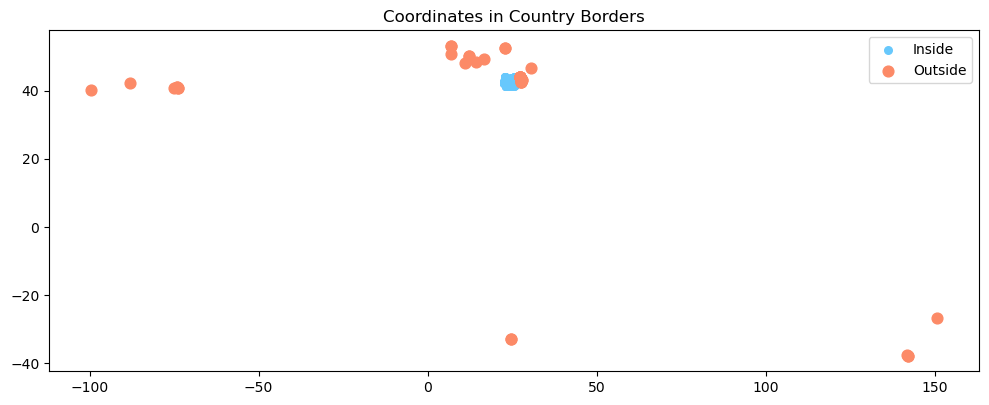

In [48]:
fig, ax = plt.subplots(figsize=(12, 12))
country.plot(ax=ax, color='lightgrey', edgecolor='grey')
points_within.plot(ax=ax, color='#67c8fc', markersize=30, label='Inside')
geo_df[~geo_df.index.isin(points_within.index)].plot(ax=ax, color='#fc8a67', markersize=60, label='Outside')

plt.title("Coordinates in Country Borders")
plt.legend()
plt.show()

<h4>Inspect Rows with Outside Coordinates</h4>

In [49]:
points_outside[['Company Name', 'Latitude', 'Longitude']].drop_duplicates()

,Company Name,Latitude,Longitude
15,DEKO KALIP BULGARIA,46.498060,30.641130
17,CIMAK,44.109806,27.230471
19,SILOMA,44.109806,27.230471
113,CODKEY TECHNOLOGIES,-26.747953,150.630222
150,TONI START-SILISTRA,44.113707,27.250638
155,DAMVENT,40.760535,-74.973628
162,PETROMET,-37.600011,141.686962
195,ELICOM ELECTRONIC - GEORGIEV,44.113707,27.250638
215,INDEX - 6,53.148688,7.035676
220,COMPAX,52.403149,22.943505


<h4>Export as HTML</h4>

In [50]:
country_projected = country.to_crs("EPSG:3857")
centroid = country_projected.geometry.centroid.to_crs("EPSG:4326")
center_lat, center_lon = centroid.y.mean(), centroid.x.mean()

In [51]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

folium.GeoJson(country).add_to(m)

for idx, row in points_outside.iterrows():
    color = 'lightblue' if idx in points_within.index else 'lightred'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Company Name'],
        icon=folium.Icon(color=color)
    ).add_to(m)

m.save('map_Bulgaria.html')

In [52]:
webbrowser.open('map_Bulgaria.html',new = 2)

True

<h3>📝 Correct Incorrect Entries</h3>

<h4>Resolve Busines Model</h4>

In [53]:
B_Original_df['Business Model'].unique()

array(['OEM', 'Distributor'], dtype=object)

<h4>Resolve Category</h4>

In [54]:
Categories = np.sort(B_Original_df['Category'].unique())
Categories

array(['Agricultural Machinery', 'Boilers', 'Castings', 'Drives',
       'Electric Machinery', 'Food, Beverage, & Pharmaceutical Machinery',
       'Hardware Metal Products and Products of Other Materials',
       'Hydraulic and Pneumatic Components', 'Industrial Automation',
       'Industrial Furnaces', 'Industrial Turnkey Plant',
       'Internal Combustion Engines', 'Machinery for Processing Plastics',
       'Metal Cutting Tools', 'Mining Machinery', 'Motors',
       'Office Machinery', 'Packaging',
       'Papermaking and Converting Machinery',
       'Printing and Binding Machinery',
       'Pumps, Fans, Compressors, and Vacuum Pumps',
       'Refrigerating Equipment', 'Services', 'Subcontract Service',
       'Tools, Cutters, Moulds, and Dies', 'Weighing Machines',
       'Welding and Cutting Machinery', 'Woodworking Machinery'],
      dtype=object)

<h4>Resolve Subcategory</h4>

In [55]:
B_Original_df['Subcategory'] = B_Original_df['Subcategory'].str.title()

In [56]:
Subcategories = B_Original_df['Subcategory'].unique()
Subcategories

array([nan, 'Abb', 'Rockwell Automation', 'Weg Electric', 'Bonfiglioli',
       'Sew-Eurodrive', 'Eaton', 'Nxp Semiconductors', 'Schaeffler'],
      dtype=object)

In [57]:
B_Original_df['Subcategory'] = None

<h4>Resolve State</h4>

In [72]:
B_Original_df['State'].sort_values().unique().tolist()

['Blagoevgrad',
 'Burgas',
 'Dobrich',
 'Gabrovo',
 'Haskovo',
 'Kardzhali',
 'Kyustendil',
 'Lovech',
 'Montana',
 'Pazardzhik',
 'Pernik',
 'Pleven',
 'Plovdiv',
 'Razgrad',
 'Ruse',
 'Shumen',
 'Silistra',
 'Sliven',
 'Smolyan',
 'Sofia',
 'Stara Zagora',
 'Targovishte',
 'Varna',
 'Veliko Tarnovo',
 'Vidin',
 'Vratsa',
 'Yambol',
 None]

In [59]:
bulgarian_provinces = {
    'Aksakovo': 'Varna',
    'Aleksandrovo': 'Haskovo',
    'Alfatar': 'Silistra',
    'Antonovo': 'Targovishte',
    'Apriltsi': 'Lovech',
    'Ardino': 'Kardzhali',
    'Asenovgrad': 'Plovdiv',
    'Aytos': 'Burgas',
    'Balgarene': 'Vratsa',
    'Balgarovo': 'Burgas',
    'Bankya': 'Sofia',
    'Bansko': 'Blagoevgrad',
    'Banya': 'Plovdiv',
    'Barutin': 'Pazardzhik',
    'Batak': 'Pazardzhik',
    'Bel Kamen': 'Pernik',
    'Belashtitsa': 'Plovdiv',
    'Belene': 'Pleven',
    'Belitsa': 'Blagoevgrad',
    'Belo Pole': 'Plovdiv',
    'Belovo': 'Pazardzhik',
    'Belozem': 'Plovdiv',
    'Belyakovets': 'Veliko Tarnovo',
    'Benkovski': 'Sliven',
    'Blagoevgrad': 'Blagoevgrad',
    'Boboshevo': 'Kyustendil',
    'Bogdan': 'Razgrad',
    'Bogutevo': 'Vidin',
    'Borima': 'Vidin',
    'Borino': 'Smolyan',
    'Botevgrad': 'Sofia',
    'Boykovo': 'Stara Zagora',
    'Bozhurishte': 'Sofia',
    'Branipole': 'Pazardzhik',
    'Bratsigovo': 'Pazardzhik',
    'Brestnik': 'Plovdiv',
    'Breznik': 'Pernik',
    'Buntsevo': 'Blagoevgrad',
    'Burgas': 'Burgas',
    'Burya': 'Plovdiv',
    'Busmantsi': 'Sofia',
    'Byal Bryag': 'Pleven',
    'Byal Izvor': 'Vratsa',
    'Byala': 'Ruse',
    'Byala Cherkva': 'Veliko Tarnovo',
    'Chakalarovo': 'Burgas',
    'Chepelare': 'Smolyan',
    'Chereshovo': 'Blagoevgrad',
    'Cherganovo': 'Veliko Tarnovo',
    'Cherkovitsa': 'Veliko Tarnovo',
    'Chernevo': 'Burgas',
    'Cherni Osam': 'Lovech',
    'Cherniche': 'Burgas',
    'Chernomorets': 'Burgas',
    'Cherven Bryag': 'Pleven',
    'Cheshnegirovo': 'Plovdiv',
    'Chirpan': 'Stara Zagora',
    'Chorbadzhiysko': 'Sliven',
    'Dabene': 'Sofia',
    'Dabnitsa': 'Blagoevgrad',
    'Dalbok Dol': 'Plovdiv',
    'Devin': 'Smolyan',
    'Dimitrovgrad': 'Haskovo',
    'Dobrich': 'Dobrich',
    'Dobrinishte': 'Blagoevgrad',
    'Dobroplodno': 'Burgas',
    'Dolina': 'Plovdiv',
    'Dolna Oryahovitsa': 'Veliko Tarnovo',
    'Dolni Chiflik': 'Varna',
    'Dolni Glavanak': 'Kardzhali',
    'Dolno Kamartsi': 'Sofia',
    'Dorkovo': 'Pazardzhik',
    'Dospat': 'Smolyan',
    'Dospey': 'Sofia',
    'Dragor': 'Smolyan',
    'Drangovo': 'Silistra',
    'Dryanovo': 'Gabrovo',
    'Dulovo': 'Silistra',
    'Dunavtsi': 'Vidin',
    'Dupnitsa': 'Kyustendil',
    'Dushantsi': 'Kyustendil',
    'Dyadovo': 'Sliven',
    'Dyankovo': 'Shumen',
    'Dzhebel': 'Kardzhali',
    'Elena': 'Veliko Tarnovo',
    'Eleshnitsa': 'Blagoevgrad',
    'Elhovo': 'Yambol',
    'Elin Pelin': 'Sofia',
    'Etropole': 'Sofia',
    'Gabarevo': 'Veliko Tarnovo',
    'Gabene': 'Sofia',
    'Gabrovo': 'Gabrovo',
    'Galabovo': 'Stara Zagora',
    'Garmen': 'Blagoevgrad',
    'Gela': 'Smolyan',
    'General Toshevo': 'Dobrich',
    'German': 'Plovdiv',
    'Gesha': 'Smolyan',
    'Glavinitsa': 'Silistra',
    'Godech': 'Sofia',
    'Golyamo Gradishte': 'Ruse',
    'Gorna Malina': 'Sofia',
    'Gorna Oryahovitsa': 'Veliko Tarnovo',
    'Gorno Draglishte': 'Blagoevgrad',
    'Gorno Kraishte': 'Blagoevgrad',
    'Gorno Sahrane': 'Stara Zagora',
    'Gotse Delchev': 'Blagoevgrad',
    'Govedartsi': 'Sofia',
    'Graf Ignatievo': 'Plovdiv',
    'Grozdyovo': 'Burgas',
    'Gulyantsi': 'Pleven',
    'Gumoshtnik': 'Lovech',
    'Gurkovo': 'Stara Zagora',
    'Hadzhidimovo': 'Blagoevgrad',
    'Harmanli': 'Haskovo',
    'Haskovo': 'Haskovo',
    'Hisarya': 'Plovdiv',
    'Hitrino': 'Shumen',
    'Hlyabovo': 'Yambol',
    'Hrabrino': 'Plovdiv',
    'Hrishteni': 'Gabrovo',
    'Ihtiman': 'Sofia',
    'Isperih': 'Razgrad',
    'Izbeglii': 'Pazardzhik',
    'Kableshkovo': 'Burgas',
    'Kalekovets': 'Plovdiv',
    'Kalipetrovo': 'Pazardzhik',
    'Kaloyanovo': 'Plovdiv',
    'Kamenitsa': 'Blagoevgrad',
    'Kameno': 'Burgas',
    'Kardzhali': 'Kardzhali',
    'Karlovo': 'Plovdiv',
    'Karnobat': 'Burgas',
    'Kaspichan': 'Shumen',
    'Kavarna': 'Dobrich',
    'Kazanlak': 'Stara Zagora',
    'Kichevo': 'Varna',
    'Kirkovo': 'Kardzhali',
    'Kochan': 'Plovdiv',
    'Kokalyane': 'Sofia',
    'Konarsko': 'Plovdiv',
    'Kopilovtsi': 'Sofia',
    'Koprinka': 'Stara Zagora',
    'Koprivets': 'Targovishte',
    'Koprivshtitsa': 'Sofia',
    'Kostandovo': 'Blagoevgrad',
    'Kostenets': 'Sofia',
    'Kostievo': 'Varna',
    'Kostinbrod': 'Sofia',
    'Kran': 'Stara Zagora',
    'Krastava': 'Blagoevgrad',
    'Kresna': 'Blagoevgrad',
    'Krichim': 'Plovdiv',
    'Krumovgrad': 'Kardzhali',
    'Krumovo': 'Plovdiv',
    'Krushevets': 'Silistra',
    'Kubrat': 'Razgrad',
    'Kuklen': 'Plovdiv',
    'Kyustendil': 'Kyustendil',
    'Lesidren': 'Lovech',
    'Levski': 'Pleven',
    'Lom': 'Montana',
    'Lovech': 'Lovech',
    'Lozarevo': 'Burgas',
    'Lukovit': 'Lovech',
    'Lyaskovets': 'Veliko Tarnovo',
    'Lyaskovo': 'Veliko Tarnovo',
    'Lyubimets': 'Haskovo',
    'Lyulyakovo': 'Yambol',
    'Lyutidol': 'Pleven',
    'Malomir': 'Yambol',
    'Marikostinovo': 'Blagoevgrad',
    'Marino Pole': 'Haskovo',
    'Markovo': 'Plovdiv',
    'Medovene': 'Sliven',
    'Merichleri': 'Haskovo',
    'Mesta': 'Blagoevgrad',
    'Mezdra': 'Vratsa',
    'Mitovska': 'Montana',
    'Mitrovtsi': 'Gabrovo',
    'Mogilets': 'Veliko Tarnovo',
    'Momchilgrad': 'Kardzhali',
    'Momchilovtsi': 'Smolyan',
    'Momin Sbor': 'Sofia',
    'Momkovo': 'Blagoevgrad',
    'Montana': 'Montana',
    'Mostich': 'Shumen',
    'Mursalevo': 'Kyustendil',
    'Musomishta': 'Blagoevgrad',
    'Nikopol': 'Pleven',
    'Nova Mahala': 'Vratsa',
    'Novi Iskar': 'Sofia',
    'Novi Pazar': 'Shumen',
    'Novo Panicharevo': 'Blagoevgrad',
    'Opaka': 'Targovishte',
    'Oreshak': 'Lovech',
    'Osina': 'Varna',
    'Ovoshtnik': 'Plovdiv',
    'Panagyurishte': 'Pazardzhik',
    'Panichkovo': 'Yambol',
    'Parvenets': 'Pazardzhik',
    'Parvomay': 'Plovdiv',
    'Parvomaytsi': 'Veliko Tarnovo',
    'Pavlikeni': 'Veliko Tarnovo',
    'Pazardzhik': 'Pazardzhik',
    'Pernik': 'Pernik',
    'Perushtitsa': 'Plovdiv',
    'Peshtera': 'Pazardzhik',
    'Petarch': 'Sofia',
    'Petrich': 'Blagoevgrad',
    'Pirin': 'Blagoevgrad',
    'Plachkovtsi': 'Gabrovo',
    'Pleven': 'Pleven',
    'Plovdiv': 'Plovdiv',
    'Polenitsa': 'Blagoevgrad',
    'Polski Trambesh': 'Veliko Tarnovo',
    'Popovo': 'Targovishte',
    'Popovtsi': 'Gabrovo',
    'Pravets': 'Sofia',
    'Primorsko': 'Burgas',
    'Prisovo': 'Plovdiv',
    'Prolesha': 'Blagoevgrad',
    'Provadiya': 'Varna',
    'Radinovo': 'Plovdiv',
    'Radomir': 'Pernik',
    'Radomirtsi': 'Plovdiv',
    'Raduil': 'Blagoevgrad',
    'Rakitovo': 'Pazardzhik',
    'Razgrad': 'Razgrad',
    'Razlog': 'Blagoevgrad',
    'Ribaritsa': 'Lovech',
    'Ribnovo': 'Blagoevgrad',
    'Rogosh': 'Vidin',
    'Roman': 'Varna',
    'Rozino': 'Plovdiv',
    'Rudnik': 'Plovdiv',
    'Rudozem': 'Smolyan',
    'Rupite': 'Blagoevgrad',
    'Ruse': 'Ruse',
    'Sadovo': 'Plovdiv',
    'Saedinenie': 'Plovdiv',
    'Samokov': 'Sofia',
    'Sandanski': 'Blagoevgrad',
    'Sandrovo': 'Ruse',
    'Sarnitsa': 'Pazardzhik',
    'Satovcha': 'Blagoevgrad',
    'Selishte': 'Kyustendil',
    'Septemvri': 'Pazardzhik',
    'Sestrimo': 'Kyustendil',
    'Sevlievo': 'Gabrovo',
    'Shemshevo': 'Sofia',
    'Shipka': 'Stara Zagora',
    'Shivachevo': 'Sliven',
    'Shumen': 'Shumen',
    'Silistra': 'Silistra',
    'Simitli': 'Blagoevgrad',
    'Sinitovo': 'Plovdiv',
    'Sitovo': 'Silistra',
    'Skravena': 'Sofia',
    'Slivata': 'Plovdiv',
    'Sliven': 'Sliven',
    'Slivnitsa': 'Sofia',
    'Slivo Pole': 'Ruse',
    'Slokoshtitsa': 'Plovdiv',
    'Smirnenski': 'Ruse',
    'Smolyan': 'Smolyan',
    'Sofia': 'Sofia',
    'Sokolovo': 'Burgas',
    'Sopitsa': 'Blagoevgrad',
    'Stamboliyski': 'Plovdiv',
    'Stara Reka': 'Veliko Tarnovo',
    'Stara Zagora': 'Stara Zagora',
    'Starnitsa': 'Blagoevgrad',
    'Startsevo': 'Sofia',
    'Strazhitsa': 'Veliko Tarnovo',
    'Struma': 'Blagoevgrad',
    'Strumeshnitsa': 'Blagoevgrad',
    'Stryama': 'Plovdiv',
    'Suhindol': 'Veliko Tarnovo',
    'Sungurlare': 'Burgas',
    'Svishtov': 'Veliko Tarnovo',
    'Svoge': 'Sofia',
    'Targovishte': 'Targovishte',
    'Tazha': 'Stara Zagora',
    'Teteven': 'Lovech',
    'Ticha': 'Varna',
    'Topoli': 'Varna',
    'Toros': 'Stara Zagora',
    'Tran': 'Pernik',
    'Troyan': 'Lovech',
    'Trud': 'Plovdiv',
    'Tryavna': 'Gabrovo',
    'Tsaratsovo': 'Plovdiv',
    'Tsenovo': 'Ruse',
    'Tushovitsa': 'Pernik',
    'Tutrakan': 'Silistra',
    'Tutrakantsi': 'Silistra',
    'Tvarditsa': 'Sliven',
    'Varna': 'Varna',
    'Varshets': 'Montana',
    'Varvara': 'Burgas',
    'Vedrare': 'Pazardzhik',
    'Veliki Preslav': 'Shumen',
    'Veliko Tarnovo': 'Veliko Tarnovo',
    'Velingrad': 'Pazardzhik',
    'Venets': 'Shumen',
    'Vetovo': 'Ruse',
    'Vidin': 'Vidin',
    'Vievo': 'Sofia',
    'Vladaya': 'Sofia',
    'Voden': 'Plovdiv',
    'Vodno': 'Varna',
    'Voluyak': 'Sofia',
    'Voyvodinovo': 'Plovdiv',
    'Voyvodovo': 'Vratsa',
    'Vratsa': 'Vratsa',
    'Yablanitsa': 'Lovech',
    'Yagodovo': 'Plovdiv',
    'Yakoruda': 'Blagoevgrad',
    'Yambol': 'Yambol',
    'Yavorets': 'Gabrovo',
    'Zabardo': 'Blagoevgrad',
    'Zagoriche': 'Sliven',
    'Zagrazhden': 'Blagoevgrad',
    'Zavet': 'Razgrad',
    'Zhaltusha': 'Lovech',
    'Zhitnitsa': 'Vratsa',
    'Zlataritsa': 'Veliko Tarnovo',
    'Zlatograd': 'Smolyan',
}

In [60]:
towns = B_Original_df['State'].sort_values().unique().tolist()

In [61]:
B_Original_df['State'] = B_Original_df['State'].map(bulgarian_provinces)

In [62]:
B_Original_df['State'] = B_Original_df['State'].where(B_Original_df['State'].notna(), None)

In [73]:
unmapped_towns = B_Original_df[B_Original_df['State'].isna() & B_Original_df['State'].notna()]['State'].unique()

In [74]:
unmapped_towns

array([], dtype=object)

In [75]:
State_mode = B_Original_df['State'].mode()

In [76]:
State_mode

0    Sofia
Name: State, dtype: object

In [77]:
B_Original_df['State'] = B_Original_df['State'].fillna(State_mode)

In [63]:
B_Original_df.head(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Employees
0,OEM,Metal Cutting Tools,None,MACHINE COMMERCE LTD,"11 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Plovdiv,Bulgaria,+359886399355,+35933163030,NaN,NaN,3109200.0,<NA>
1,OEM,Metal Cutting Tools,None,ZMM - SLIVEN,"16 Bansko Shose str.,Sliven,Bulgaria,8800",42.639093,26.303853,Sliven,Bulgaria,+35944622891,+35944662563,www.zmmsliven.com,office@zmmbulgaria.com,15227800.0,<NA>
2,OEM,Metal Cutting Tools,None,UNITECH-TROYAN,"229 str. GENERAL KARTSOV,Troyan,Bulgaria,5600",42.869076,24.711611,Lovech,Bulgaria,+359885329733,NaN,NaN,NaN,534693.0,<NA>
3,OEM,Metal Cutting Tools,None,FACTORY FOR GRINDING MACHINES,"13 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Plovdiv,Bulgaria,+35933163797,+35933163788,www.zshm-as.com,zshm@zshm-as.com,<NA>,<NA>
4,OEM,Metal Cutting Tools,None,MACHINES IN THREE DIMENSIONS,"69 Shipchenski Prohod blvd. - Slatina Distr.,S...",42.848278,23.268520,Sofia,Bulgaria,+35928700142,+35924626316,www.m3d.bg,office@m3d.bg,225103.0,<NA>


<h4>Resolve Country</h4>

In [64]:
B_Original_df['Country'].unique()

array(['Bulgaria'], dtype=object)

<h4>Resolve Annual Sales</h4>

In [69]:
Annual_Sales_mean = round(B_Original_df['Annual Sales'].mean())

In [70]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].fillna(Annual_Sales_mean)

<h4>Resolve Employees</h4>

In [66]:
Employees_mean = round(B_Original_df['Employees'].mean())

In [67]:
B_Original_df['Employees'] = B_Original_df['Employees'].fillna(Employees_mean)

<h3>📈 Detect and Treat Outliers</h3>

In [77]:
plt.style.use('fivethirtyeight')

<h4>Check Latitude</h4>

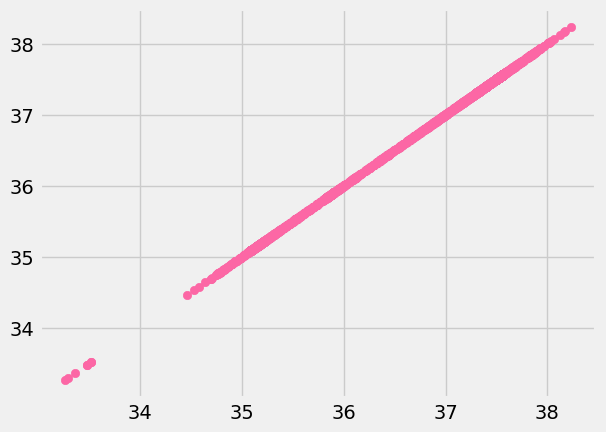

In [78]:
plt.scatter(B_Original_df['Latitude'], B_Original_df['Latitude'], color='#fc67a5')
plt.show()

<h4>Check Longitude</h4>

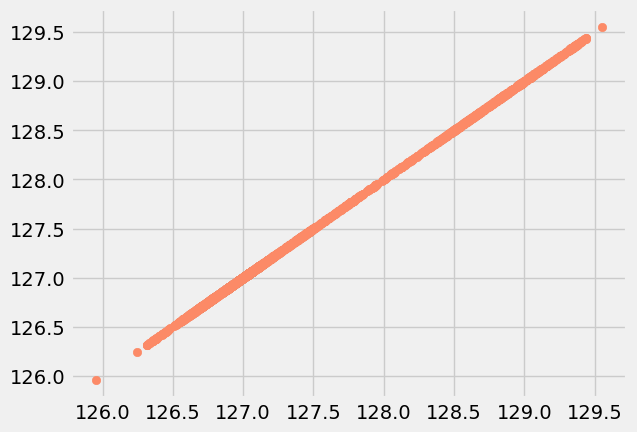

In [79]:
plt.scatter(B_Original_df['Longitude'], B_Original_df['Longitude'], color='#fc8a67')
plt.show()

<h4>Check Annual Sales</h4>

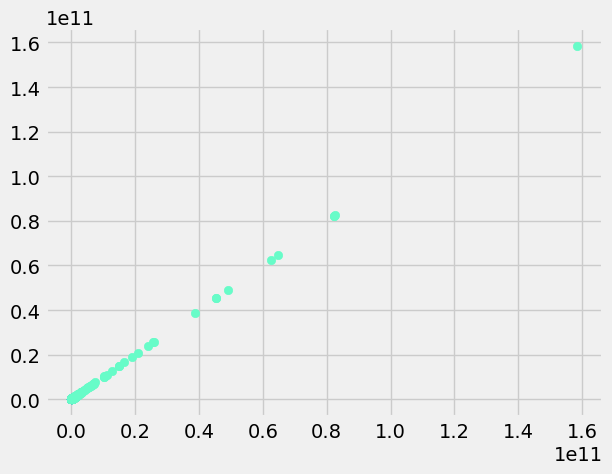

In [81]:
plt.scatter(B_Original_df['Annual Sales'], B_Original_df['Annual Sales'], color='#67fcc8')
plt.show()

<h4>Check Employees</h4>

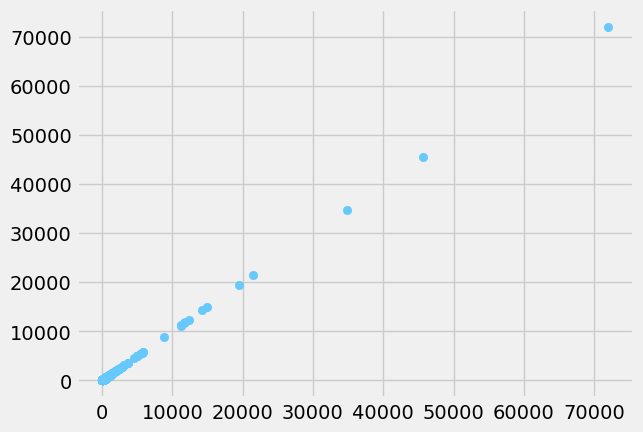

In [82]:
plt.scatter(B_Original_df['Employees'], B_Original_df['Employees'], color='#67c8fc')
plt.show()

So far, there are <b>no outliers</b> in the dataset.

<h2>🔎 Finalize Dataset</h2>

<h3>Check Data Types</h3>

In [99]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5214 entries, 0 to 6595
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status                         1677 non-null   object 
 1   Business Model                 5214 non-null   object 
 2   Category                       5214 non-null   object 
 3   Valid Category/Business Model  5214 non-null   object 
 4   Subcategory                    4908 non-null   object 
 5   Company                        5214 non-null   object 
 6   Address                        5214 non-null   object 
 7   Latitude                       5214 non-null   float64
 8   Longitude                      5214 non-null   float64
 9   State                          5214 non-null   object 
 10  Country                        5214 non-null   object 
 11  Contact No.                    1110 non-null   object 
 12  Fax No.                        3113 non-null   object

<h3>Check For Null Values</h3>

In [100]:
B_Original_df.isnull().any()

Status                            True
Business Model                   False
Category                         False
Valid Category/Business Model    False
Subcategory                       True
Company                          False
Address                          False
Latitude                         False
Longitude                        False
State                            False
Country                          False
Contact No.                       True
Fax No.                           True
Website                           True
Email                             True
Annual Sales                      True
Annual Sales (Range)              True
Employees                         True
Incorrect                         True
dtype: bool

<h3>Summarize Dataset</h3>

In [101]:
B_Original_df.describe()

,Latitude,Longitude,Annual Sales,Employees
count,5214.000000,5214.000000,1840.0,1377.0
mean,36.831264,127.442084,760808453.261413,456.944808
std,0.899603,0.797900,5931098412.397326,2770.520663
min,33.258930,126.243515,58312.0,1.0
25%,35.954991,126.906336,17708262.0,32.0
50%,37.317116,127.057657,55195600.0,81.0
75%,37.510522,127.766922,197069062.5,249.0
max,38.233460,129.553072,158476877300.0,72001.0


<h3>Check Random Samples</h3>

In [102]:
B_Original_df.sample(5)

,Status,Business Model,Category,Valid Category/Business Model,Subcategory,Company,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Annual Sales (Range),Employees,Incorrect
3462,NaN,OEM,Casting,Invalid,Costing For Textile Machinery Use,"DAIRO MC CO., LTD","Rm 512 Hakun-ri 117 Hwanggeum-ro Yangchon-eup,...",37.617106,126.621029,Gyeonggi-do,South Korea,(+82) 2-8525-191,NaN,na4.dnbi.com/dnbiweb/#/dnbi/internationalEcf/f...,NaN,<NA>,NaN,<NA>,NaN
1522,Correct,End-User,Automotive,Invalid,Other Basic Metals Other Basic Metals,HANDS CORPORATION LTD.,"50, Gajeong-ro 37beon-gil, Seo-gu, INCHEON",37.488754,126.665191,Incheon,South Korea,NaN,NaN,handscorp.co.kr,NaN,582134700.0,"$100,000,000 and above",1213,NaN
3258,NaN,OEM,Metal Cutting Tools,Invalid,Metal Turning Machines Gear Cutting Machines,"DAESUNG HI-TECH CO., LTD","10, Techno-daero 2-gil, Hyeonpung-myeon, Dalse...",35.687709,128.446577,Daegu,South Korea,NaN,(+82) 5-3592-6559,topdsht.com/eng/,NaN,<NA>,NaN,<NA>,NaN
5066,NaN,OEM,Special Machine Tools,Invalid,Needles,"EINS MED CO.,LTD","307, Ssangyong IT Twintower 1, 442-17, Sangdae...",37.431980,127.176401,Gyeonggi-do,South Korea,NaN,(+82) 3-1608-5245,einsmed.com/,NaN,<NA>,NaN,<NA>,NaN
5084,NaN,OEM,Woodworking Machinery,Invalid,Band Sawing Machines For Woodworking,"Mac Nels Agencies Pte., Ltd.",61 YANGHWA-RO MAPO-GU SEOUL KOREA,37.550822,126.915069,Seoul,South Korea,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN


<h2>📥 Download Dataset</h2>

In [103]:
B_Original_df.to_csv('datasets\output\Dataset_Korea_cleaned.csv', index=False)

In [104]:
K_Incorrect_df.to_csv('datasets\output\Dataset_Korea_incorrect.csv', index=False)

<h2>💌 Credits ✉️</h2>

This project is done by <b>ERMITANO, Kate Justine</b> as a part of the internship tasks under the instructions of <b>Miss Fherlyn Charl Yet</b>.